# Pricing of Cash or nothing options with the COS method

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 

In [4]:
def DigitalPayoffValuation(S,T,r,payoff):
    # S is a vector of Monte Carlo samples at T
    return np.exp(-r*T) * np.mean(payoff(S))

In [5]:
def GeneratePathsGBMEuler(NoOfPaths, NoOfSteps, T, r, sigma, S_0):
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    W = np.zeros([NoOfPaths, NoOfSteps+1])
   
    # Euler Approximation
    S1 = np.zeros([NoOfPaths, NoOfSteps+1])
    S1[:, 0] = S_0
    
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        
        W[:,i+1] = W[:,i] + np.power(dt, 0.5)*Z[:,i]
        
        S1[:,i+1] = S1[:,i] + r * S1[:,i]* dt + sigma * S1[:,i] * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] + dt
        
    # Retun S
    paths = {"time":time,"S":S1}
    return paths

In [9]:
def UpAndOutBarrier(S, T, r, payoff, Su):
    # Handling of a barrier
    n1, n2 = S.shape
    barrier = np.zeros([n1, n2]) + Su
    
    # Check if there is any value of stock bigger than the barrier limit
    hitM = S > barrier
    # Sum by row (paths)
    hitVec = np.sum(hitM, 1)
    # Check if is there any paths which the stock price is bigger than the barrier
    hitVec = (hitVec == 0).astype(int)
    
    V_0 = np.exp(-r*T) * np.mean(payoff(S[:, -1] * hitVec))
    
    return V_0

Value of the contract at t0 = 14.850445796649522
Value of the barrier contract at t0 = 2.659396186741167


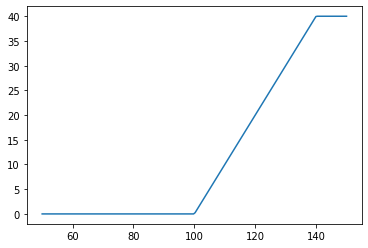

In [12]:
def mainCalculation():
    NoOfPaths = 10000
    NoOfSteps = 250
   
    S0    = 100.0
    r     = 0.05
    T    = 5
    sigma = 0.2
    Su = 150
    
    paths = GeneratePathsGBMEuler(NoOfPaths,NoOfSteps,T,r,sigma,S0)
    S_paths = paths["S"]
    S_T = S_paths[:,-1]
    
    # Payoff setting    
    K  = 100.0
    K2 = 140
    
    # Payoff specification
    payoff = lambda S: np.maximum(S - K, 0) - np.maximum(S - K2, 0)
    
    #Plot
    S_T_grid = np.linspace(50, S0*1.5, 200)
    
    plt.figure(1)
    plt.plot(S_T_grid,payoff(S_T_grid))
    
    # Valuation
    val_t0 = DigitalPayoffValuation(S_T,T,r,payoff)
    print("Value of the contract at t0 = {0}".format(val_t0))
    
    # barrier pricing
    barrier_price = UpAndOutBarrier(S_paths, T, r, payoff, Su)
    
    print("Value of the barrier contract at t0 = {0}".format(barrier_price))
    
mainCalculation()

When we set up K2 for the upper limit, we reduce the value of option. When we set the up-and-out barrier, the value of barrier contract is cheaper than the regular one.